# Name: 
# Ankit Dhandharia (CWID - )
# Aadit Harshal Baldha (CWID - 20029691)
# Riya Soni (CWID - )

## Batch: Fall 2024(2nd Sem)

### Topic: ML Fundamentals and Applications Project Generalization Part

#### 4. Generalization

In [68]:
import pandas as pd
pd.set_option('display.max_columns',None)
dataset = pd.read_csv('test_data.csv')
dataset.columns = dataset.columns.str.strip()
dataset.head()

Index  ROA(C) before interest and depreciation before interest  \
0      0                                           0.414323         
1      1                                           0.497441         
2      2                                           0.501584         
3      3                                           0.574465         
4      4                                           0.393360         

   ROA(A) before interest and % after tax  \
0                                0.481029   
1                                0.560892   
2                                0.548899   
3                                0.637375   
4                                0.456444   

   ROA(B) before interest and depreciation after tax  Operating Gross Margin  \
0                                           0.468280                0.609514   
1                                           0.546603                0.610660   
2                                           0.556721                0.606134   
3                                           0.619680                0.600376   
4                                           0.440334                0.600009   

   Realized Sales Gross Margin  Operating Profit Rate  \
0                     0.609514               0.998889   
1                     0.610660               0.999108   
2                     0.606134               0.999034   
3                     0.600376               0.999030   
4                     0.600009               0.998800   

   Pre-tax net Interest Rate  After-tax net Interest Rate  \
0                   0.797159                     0.809132   
1                   0.797545                     0.809431   
2                   0.797427                     0.809370   
3                   0.797528                     0.809426   
4                   0.797025                     0.809000   

   Non-industry income and expenditure/revenue  \
0                                     0.303290   
1                                     0.303506   
2                                     0.303453   
3                                     0.303640   
4                                     0.303240   

   Continuous interest rate (after tax)  Operating Expense Rate  \
0                              0.781361            3.351150e-04   
1                              0.781691            1.344850e-04   
2                              0.781657            1.356420e-04   
3                              0.781691            4.760000e+09   
4                              0.781206            2.713990e-04   

   Research and development expense rate  Cash flow rate  \
0                           1.769160e-04        0.455909   
1                           0.000000e+00        0.476061   
2                           7.110000e+09        0.470906   
3                           4.750000e+08        0.469399   
4                           0.000000e+00        0.460686   

   Interest-bearing debt interest rate  Tax rate (A)  Net Value Per Share (B)  \
0                         3.393339e-03      0.000000                 0.172138   
1                         2.440240e-04      0.206195                 0.158443   
2                         0.000000e+00      0.000000                 0.161519   
3                         2.600000e+08      0.148902                 0.208124   
4                         6.460650e-04      0.000000                 0.174287   

   Net Value Per Share (A)  Net Value Per Share (C)  \
0                 0.172138                 0.172138   
1                 0.158443                 0.158443   
2                 0.161519                 0.161519   
3                 0.208124                 0.208124   
4                 0.174287                 0.174287   

   Persistent EPS in the Last Four Seasons  Cash Flow Per Share  \
0                                 0.200908             0.316227   
1                                 0.225867             0.323937   
2                                 0.218588

In [69]:
dataset.shape

(1012, 96)

In [70]:
dataset.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1012 entries, 0 to 1011
Data columns (total 96 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Index                                                    1012 non-null   int64  
 1   ROA(C) before interest and depreciation before interest  1012 non-null   float64
 2   ROA(A) before interest and % after tax                   1012 non-null   float64
 3   ROA(B) before interest and depreciation after tax        1012 non-null   float64
 4   Operating Gross Margin                                   1012 non-null   float64
 5   Realized Sales Gross Margin                              1012 non-null   float64
 6   Operating Profit Rate                                    1012 non-null   float64
 7   Pre-tax net Interest Rate                                1012 non-null   float64
 8   After-tax net Interest Rate 

In [71]:
dataset.describe()

Index  ROA(C) before interest and depreciation before interest  \
count  1012.000000                                        1012.000000         
mean    505.500000                                           0.503823         
std     292.283538                                           0.059989         
min       0.000000                                           0.082826         
25%     252.750000                                           0.475211         
50%     505.500000                                           0.501219         
75%     758.250000                                           0.535867         
max    1011.000000                                           0.691756         

       ROA(A) before interest and % after tax  \
count                             1012.000000   
mean                                 0.557087   
std                                  0.065458   
min                                  0.069287   
25%                                  0.534589   
50%                                  0.558929   
75%                                  0.588435   
max                                  0.777747   

       ROA(B) before interest and depreciation after tax  \
count                                        1012.000000   
mean                                            0.552079   
std                                             0.061499   
min                                             0.088388   
25%                                             0.526340   
50%                                             0.550806   
75%                                             0.585256   
max                                             0.761283   

       Operating Gross Margin  Realized Sales Gross Margin  \
count             1012.000000                  1012.000000   
mean                 0.607894                     0.607879   
std                  0.013241                     0.013234   
min                  0.445646                     0.445646   
25%                  0.600441                     0.600448   
50%                  0.606239                     0.606192   
75%                  0.614298                     0.614211   
max                  0.664495                     0.664495   

       Operating Profit Rate  Pre-tax net Interest Rate  \
count            1012.000000                1012.000000   
mean                0.998924                   0.797177   
std                 0.001322                   0.005843   
min                 0.962961                   0.616328   
25%                 0.998972                   0.797384   
50%                 0.999025                   0.797462   
75%                 0.999095                   0.797576   
max                 0.999456                   0.803263   

       After-tax net Interest Rate  \
count                  1012.000000   
mean                      0.809099   
std                       0.005584   
min                       0.636191   
25%                       0.809310   
50%                       0.809371   
75%                       0.809471   
max                       0.814604   

       Non-industry income and expenditure/revenue  \
count                                  1012.000000   
mean                                      0.303248   
std                                       0.007663   
min                                       0.062507   
25%                                       0.303469   
50%                                       0.303528   
75%                                       0.303585   
max                                       0.313087   

       Continuous interest rate (after tax)  Operating Expense Rate  \
count                           1012.000000            1.012000e+03   
mean                               0.781450            1.984398e+09   
std                                0.002603            3.235224e+09   
min                                0.712333            1.000260e-04   
25%                                0.78156

In [72]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# ----------------------
# STEP 1: Separate Target and Index
# ----------------------
indexes = dataset['Index']
dataset = dataset.drop(columns=['Index'])

# ----------------------
# STEP 2: Standardize Features
# ----------------------
scaler = StandardScaler()

# Fit scaler and transform features
standardized_array = scaler.fit_transform(dataset)

# Recreate the DataFrame
dataset = pd.DataFrame(standardized_array, columns=dataset.columns)

# ----------------------
# STEP 3: Verify
# ----------------------
print(dataset.describe())

       ROA(C) before interest and depreciation before interest  \
count                                       1.012000e+03         
mean                                        4.002069e-16         
std                                         1.000494e+00         
min                                        -7.021320e+00         
25%                                        -4.771830e-01         
50%                                        -4.342760e-02         
75%                                         5.344386e-01         
max                                         3.134329e+00         

       ROA(A) before interest and % after tax  \
count                            1.012000e+03   
mean                            -1.307694e-15   
std                              1.000494e+00   
min                             -7.455835e+00   
25%                             -3.438750e-01   
50%                              2.815826e-02   
75%                              4.791393e-01   
max          

In [73]:
columns_to_drop = [
'Research and development expense rate',
'Interest-bearing debt interest rate',
'Allocation rate per person',
'Net Value Per Share (B)',
'Net Value Per Share (A)',
'Net Value Per Share (C)',
'Per Share Net profit before tax (Yuan ¥)',
'Non-industry income and expenditure/revenue',
'Revenue per person',
'Operating profit per person',
'Net Income Flag',
'Cash Flow Per Share',
'Operating Expense Rate',
'Tax rate (A)',
'Revenue Per Share (Yuan ¥)',
'Fixed Assets Turnover Frequency',
'Inventory Turnover Rate (times)',
'Net Worth Turnover Rate (times)',
'Total Asset Turnover',
'Accounts Receivable Turnover',
'Average Collection Days',
'Current Asset Turnover Rate',
'Quick Asset Turnover Rate',
'Cash Turnover Rate',
'Total assets to GNP price',
'Inventory and accounts receivable/Net value',
'Inventory/Working Capital',
'Inventory/Current Liability',
]

dataset = dataset.drop(columns=columns_to_drop)
dataset.head()

ROA(C) before interest and depreciation before interest  \
0                                          -1.492667         
1                                          -0.106438         
2                                          -0.037330         
3                                           1.178161         
4                                          -1.842273         

   ROA(A) before interest and % after tax  \
0                               -1.162515   
1                                0.058154   
2                               -0.125154   
3                                1.227164   
4                               -1.538298   

   ROA(B) before interest and depreciation after tax  Operating Gross Margin  \
0                                          -1.363282                0.122465   
1                                          -0.089091                0.209048   
2                                           0.075517               -0.132929   
3                                           1.099748               -0.568024   
4                                          -1.817915               -0.595796   

   Realized Sales Gross Margin  Operating Profit Rate  \
0                     0.123644              -0.026342   
1                     0.210275               0.139294   
2                    -0.131888               0.083499   
3                    -0.567220               0.080175   
4                    -0.595007              -0.093506   

   Pre-tax net Interest Rate  After-tax net Interest Rate  \
0                  -0.003039                     0.006043   
1                   0.063048                     0.059465   
2                   0.042772                     0.048617   
3                   0.060182                     0.058648   
4                  -0.026087                    -0.017751   

   Continuous interest rate (after tax)  Cash flow rate  \
0                             -0.034073       -0.747989   
1                              0.092723        0.627366   
2                              0.079665        0.275541   
3                              0.092777        0.172730   
4                             -0.093694       -0.421925   

   Persistent EPS in the Last Four Seasons  \
0                                -0.966422   
1                                -0.075282   
2                                -0.335198   
3                                 1.605732   
4                                -1.773174   

   Operating Profit Per Share (Yuan ¥)  \
0                            -0.832627   
1                             0.028286   
2                            -0.446700   
3                             0.915174   
4                            -1.374408   

   Realized Sales Gross Profit Growth Rate  Operating Profit Growth Rate  \
0                                -0.100411                     -0.169811   
1                                -0.082404                     -0.032113   
2                                -0.053627                      0.314827   
3                                -0.059150                      0.043361   
4                                -0.091528                     -0.326114   

   After-tax Net Profit Growth Rate  Regular Net Profit Growth Rate  \
0                         -0.030519                       -0.033767   
1                          0.037659                        0.034587   
2                          3.328618                        3.334008   
3                          0.062681                        0.059674   
4                         -0.549470                       -0.284761   

   Continuous Net Profit Growth Rate  Total Asset Growth Rate  \
0                          -0.066499                -0.304337   
1                           0.026917                -0.671458   
2                           0.659720                 0.465205   
3                           0.057719                 0.934696   
4                          -0.378118                -0.113717   

   Net V

In [74]:
import pandas as pd
import numpy as np
import joblib

# Load saved transformation metadata from training
dropped_cols = joblib.load('output/columns_to_drop.pkl')
pca_pairs_df = joblib.load('output/pca_pairs_used.pkl')
pca_models = joblib.load('output/fitted_pca_models.pkl')

def apply_saved_drops(df, cols_to_drop):
    """Drop columns that were removed during training."""
    return df.drop(columns=[col for col in cols_to_drop if col in df.columns], errors='ignore')

def apply_saved_pca(df, pca_pairs_df, pca_models):
    """Apply the same PCA transformations used during training."""
    df_out = df.copy()
    new_cols = []

    for _, row in pca_pairs_df.iterrows():
        f1, f2 = row['Feature_1'], row['Feature_2']
        if f1 not in df_out.columns or f2 not in df_out.columns:
            continue

        subset = df_out[[f1, f2]].dropna()
        if subset.empty:
            continue

        data = subset.values - subset.values.mean(axis=0)
        key = f"{f1}__{f2}"
        model = pca_models.get(key)

        if not model:
            continue

        new_col = f"PCA_{f1}_{f2}"
        df_out[new_col] = np.nan
        df_out.loc[subset.index, new_col] = model.transform(data).flatten()
        df_out.drop(columns=[f1, f2], inplace=True)
        new_cols.append(new_col)

    return df_out, new_cols

# --- Inference Transformation Pipeline ---
# Step 1: Load and preprocess test data (replacing 'dataset' with your test dataset)
test_df = dataset  # Change to your actual test dataset path

# Step 2: Apply column drops
transformed_test_df = apply_saved_drops(test_df, dropped_cols)

# Step 3: Apply PCA transformations
transformed_test_df, new_pca_columns = apply_saved_pca(transformed_test_df, pca_pairs_df, pca_models)

# Reset index and confirm shape
transformed_test_df = transformed_test_df.reset_index(drop=True)
print(f"✅ Test set transformed: {transformed_test_df.shape}")


✅ Test set transformed: (1012, 44)


In [75]:
transformed_test_df.shape

(1012, 44)

In [76]:
transformed_test_df.columns

Index(['Operating Gross Margin', 'Realized Sales Gross Profit Growth Rate',
       'Operating Profit Growth Rate', 'After-tax Net Profit Growth Rate',
       'Continuous Net Profit Growth Rate', 'Total Asset Growth Rate',
       'Net Value Growth Rate', 'Total Asset Return Growth Rate Ratio',
       'Current Ratio', 'Quick Ratio', 'Interest Expense Ratio',
       'Total debt/Total net worth', 'Long-term fund suitability ratio (A)',
       'Working Capital to Total Assets', 'Quick Assets/Total Assets',
       'Current Assets/Total Assets', 'Cash/Total Assets',
       'Quick Assets/Current Liability', 'Cash/Current Liability',
       'Current Liabilities/Liability',
       'Long-term Liability to Current Assets',
       'Retained Earnings to Total Assets', 'Total income/Total expense',
       'Total expense/Assets', 'Working capitcal Turnover Rate',
       'Fixed Assets to Assets', 'Equity to Long-term Liability',
       'Cash Flow to Total Assets', 'Cash Flow to Liability',
       'Cash

In [77]:
transformed_test_df.describe()

Operating Gross Margin  Realized Sales Gross Profit Growth Rate  \
count            1.012000e+03                             1.012000e+03   
mean             3.995048e-15                            -6.178632e-16   
std              1.000494e+00                             1.000494e+00   
min             -1.225950e+01                            -6.697187e+00   
25%             -5.631227e-01                            -8.676158e-02   
50%             -1.250327e-01                            -7.239546e-02   
75%              4.839095e-01                            -5.616825e-02   
max              4.276832e+00                             2.183852e+01   

       Operating Profit Growth Rate  After-tax Net Profit Growth Rate  \
count                  1.012000e+03                      1.012000e+03   
mean                   5.947636e-14                     -1.930823e-15   
std                    1.000494e+00                      1.000494e+00   
min                   -2.684136e+01                     -2.785614e+01   
25%                   -6.681941e-02                      2.506773e-02   
50%                   -7.056991e-03                      4.937767e-02   
75%                    6.176363e-02                      7.622727e-02   
max                    8.721808e+00                      3.328618e+00   

       Continuous Net Profit Growth Rate  Total Asset Growth Rate  \
count                       1.012000e+03             1.012000e+03   
mean                        4.209193e-15            -1.930823e-16   
std                         1.000494e+00             1.000494e+00   
min                        -2.793566e+01            -1.966972e+00   
25%                         1.190320e-02            -2.107922e-01   
50%                         4.133439e-02             2.922342e-01   
75%                         7.362143e-02             6.417052e-01   
max                         2.690934e+00             1.555978e+00   

       Net Value Growth Rate  Total Asset Return Growth Rate Ratio  \
count           1.012000e+03                          1.012000e+03   
mean            7.723291e-17                         -1.903265e-14   
std             1.000494e+00                          1.000494e+00   
min            -2.082592e+00                         -5.227201e+00   
25%            -2.940198e-01                         -3.747483e-01   
50%            -1.777708e-01                         -9.879100e-02   
75%             3.505762e-02                          2.346484e-01   
max             1.765097e+01                          1.138925e+01   

       Current Ratio  Quick Ratio  Interest Expense Ratio  \
count   1.012000e+03  1012.000000            1.012000e+03   
mean    6.494585e-17     0.000000           -1.140941e-15   
std     1.000494e+00     1.000494            1.000494e+00   
min    -4.862206e-01    -0.043472           -2.696650e+01   
25%    -2.510309e-01    -0.043472           -2.226102e-03   
50%    -1.542430e-01    -0.043472            1.456677e-03   
75%     2.744845e-02    -0.043472            1.941662e-02   
max     2.263000e+01    26.759432            1.579238e+01   

       Total debt/Total net worth  Long-term fund suitability ratio (A)  \
count                1.012000e+03                          1.012000e+03   
mean                -3.510587e-18                         -1.228705e-17   
std                  1.000494e+00                          1.000494e+00   
min                 -3.145027e-02                         -1.372550e-01   
25%                 -3.145027e-02                         -1.119818e-01   
50%                 -3.145027e-02                         -1.019303e-01   
75%                 -3.145027e-02                         -7.530686e-02   
max                  3.179623e+01                          2.329590e+01   

       Working Capital to Total Assets  Quick Assets/Total Assets  \
count                     1.012000e+03               1.012000e+03   
mean                      3.624681e-16              -2.088799e-16

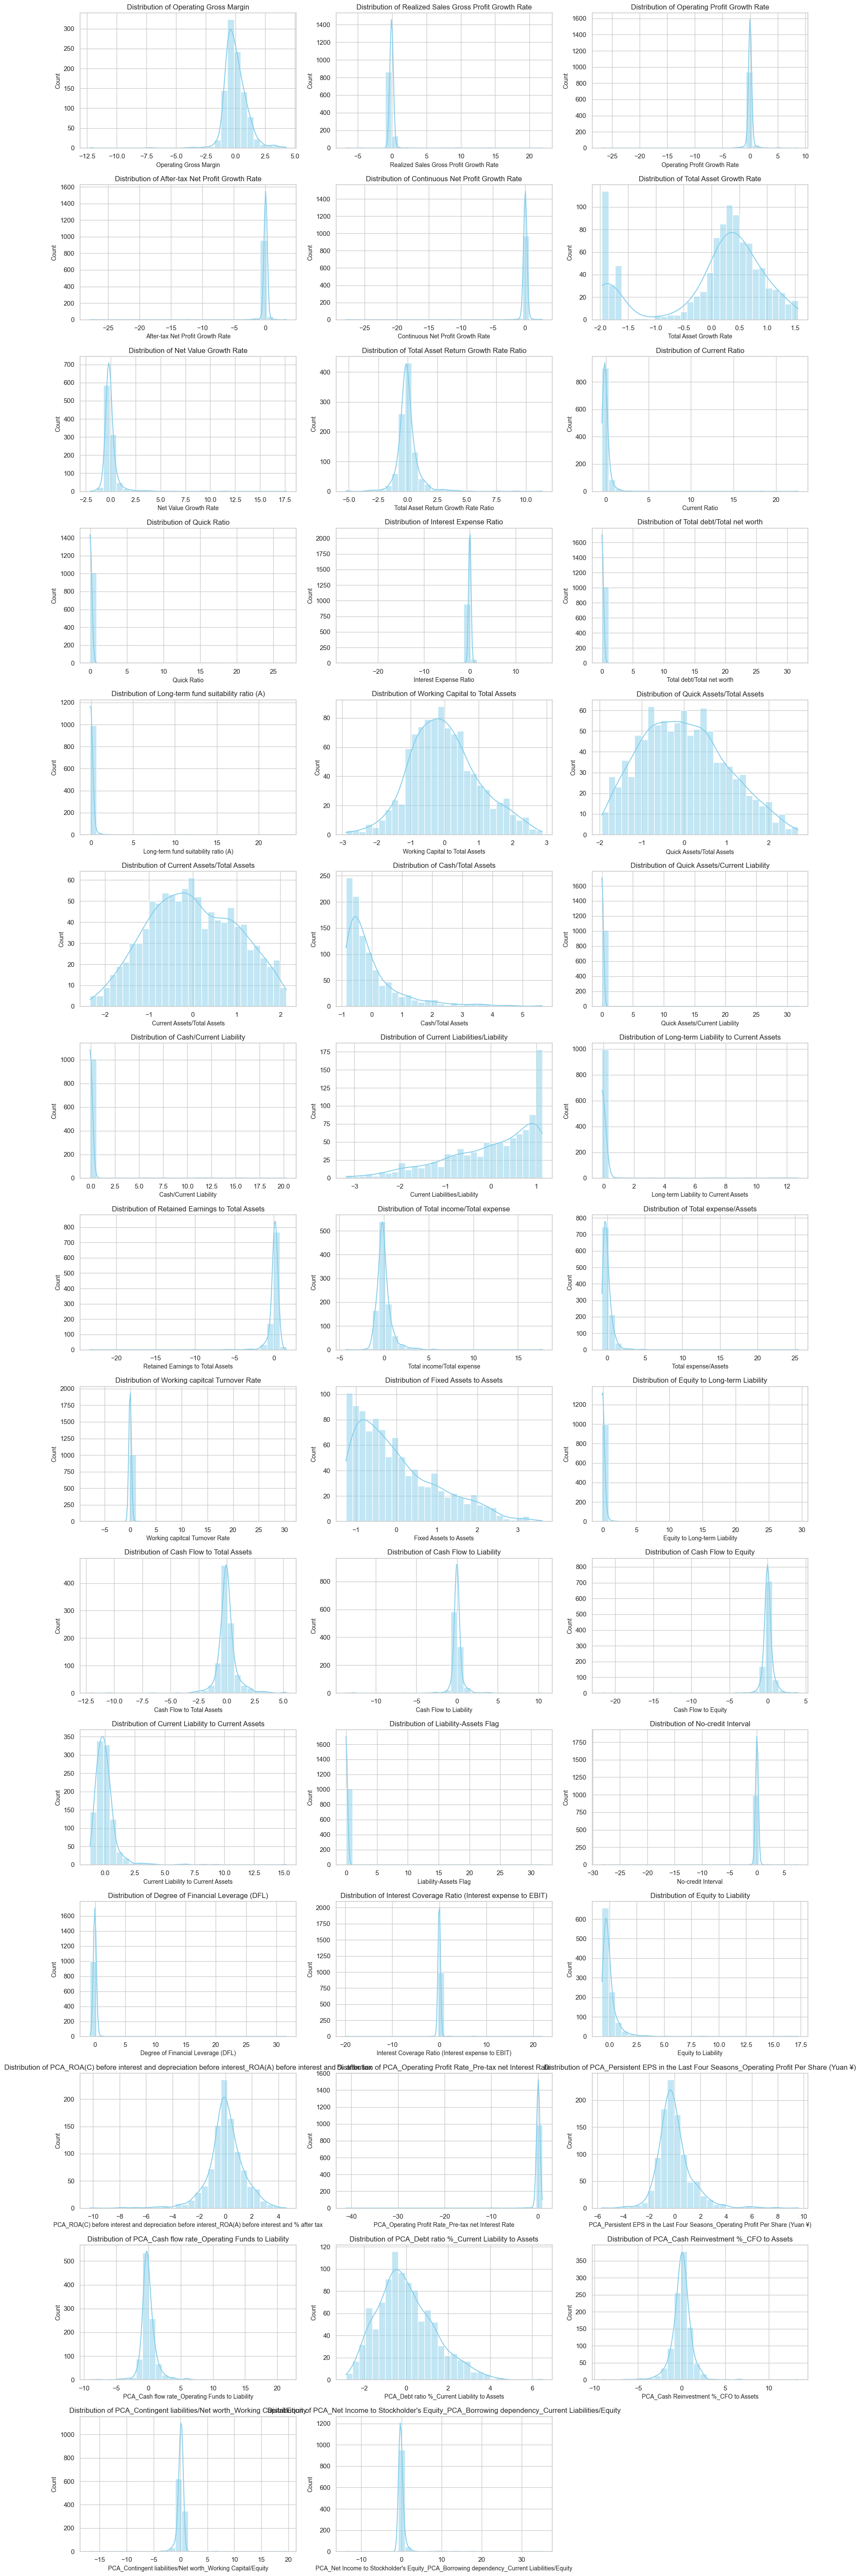

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming final_df is already defined
numerical_features = transformed_test_df.select_dtypes(include=['int64', 'float64']).columns

# Set a cohesive visual style
sns.set(style="whitegrid")

# Define the subplot grid size dynamically
n_features = len(numerical_features)
n_cols = 3  # Number of columns
n_rows = (n_features + n_cols - 1) // n_cols  # Compute rows needed

plt.figure(figsize=(6 * n_cols, 4 * n_rows))

# Create subplots for each feature
for idx, feature in enumerate(numerical_features, 1):
    plt.subplot(n_rows, n_cols, idx)
    sns.histplot(transformed_test_df[feature].dropna(), kde=True, bins=30, color="skyblue")
    plt.title(f'Distribution of {feature}', fontsize=12)
    plt.xlabel(feature, fontsize=10)
    plt.ylabel('Count', fontsize=10)

plt.tight_layout()
plt.show()


Distribution Comparison: 100%|██████████| 44/44 [00:04<00:00, 10.06it/s]


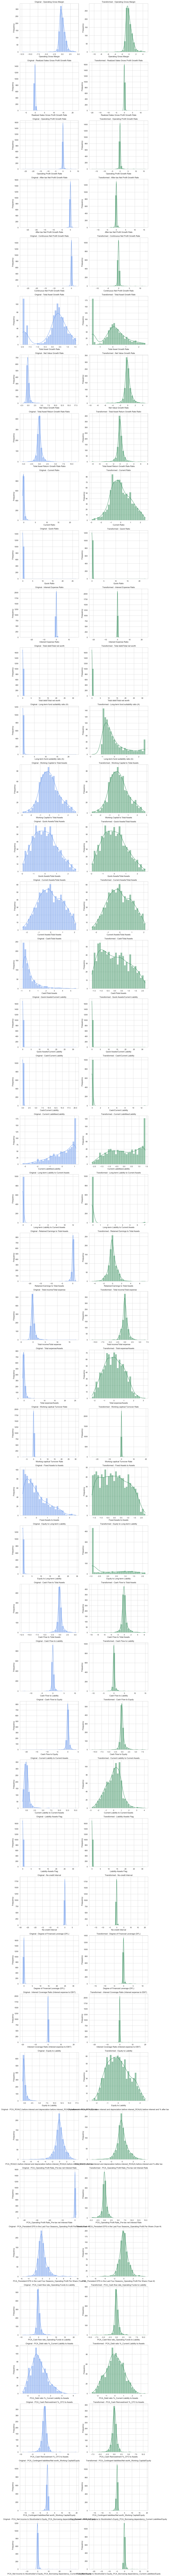


Sample of Transformed Data:
   Operating Gross Margin  Realized Sales Gross Profit Growth Rate  \
0                0.097603                                -0.085584   
1                0.185997                                -0.056167   
2               -0.159634                                -0.009622   
3               -0.587095                                -0.018510   
4               -0.614002                                -0.071045   

   Operating Profit Growth Rate  After-tax Net Profit Growth Rate  \
0                     -0.245257                         -0.194267   
1                     -0.080890                         -0.031947   
2                      0.357923                         15.733187   
3                      0.011575                          0.029613   
4                     -0.425908                         -1.227705   

   Continuous Net Profit Growth Rate  Total Asset Growth Rate  \
0                          -0.292628                -0.605790   
1    

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer, FunctionTransformer
from scipy.stats import skew
from tqdm import tqdm
import os

def plot_side_by_side_distributions(original_df, transformed_df, title_prefix="Distribution", save=False, folder_path="./plots"):
    os.makedirs(folder_path, exist_ok=True)
    num_cols = len(original_df.columns)
    
    # Create a subplot with 2 columns
    fig, axes = plt.subplots(num_cols, 2, figsize=(12, 5 * num_cols))
    
    for idx, col in enumerate(tqdm(original_df.columns, desc=title_prefix)):
        # Plot the original distribution
        sns.histplot(original_df[col].dropna(), kde=True, bins=30, color="cornflowerblue", ax=axes[idx, 0])
        axes[idx, 0].set_title(f"Original - {col}")
        axes[idx, 0].set_xlabel(col)
        axes[idx, 0].set_ylabel("Frequency")
        
        # Plot the transformed distribution
        sns.histplot(transformed_df[col].dropna(), kde=True, bins=30, color="seagreen", ax=axes[idx, 1])
        axes[idx, 1].set_title(f"Transformed - {col}")
        axes[idx, 1].set_xlabel(col)
        axes[idx, 1].set_ylabel("Frequency")
    
    plt.tight_layout()
    
    if save:
        plt.savefig(f"{folder_path}/{title_prefix.replace(' ', '_')}_side_by_side.png")
        plt.close()
    else:
        plt.show()

# --------------------------
# Adaptive Transformation Function
# --------------------------

def adaptive_transform(df):
    transformed_data = {}
    transformers = {}

    for feature in tqdm(df.columns, desc="Adaptive Transforming"):
        x = df[feature].values.reshape(-1, 1)
        feature_skew = skew(x.flatten(), nan_policy='omit')
        min_val = np.nanmin(x)

        # Default: no transform
        transformer = FunctionTransformer(func=None, validate=True)
        transformed = x

        # Skip features with ~Gaussian distribution
        if abs(feature_skew) <= 0.5:
            transformers[feature] = transformer
            transformed_data[feature] = transformed.flatten()
            continue

        try:
            # Positive-only feature: use Box-Cox
            if min_val > 0:
                transformer = PowerTransformer(method='box-cox', standardize=True)
                transformed = transformer.fit_transform(x)

            # Non-positive values: use Yeo-Johnson
            elif min_val <= 0:
                transformer = PowerTransformer(method='yeo-johnson', standardize=True)
                transformed = transformer.fit_transform(x)

            transformers[feature] = transformer
            transformed_data[feature] = transformed.flatten()
        except Exception as e:
            # If transformation fails, keep original
            print(f"Warning: Failed to transform {feature} - {e}")
            transformed_data[feature] = x.flatten()
            transformers[feature] = FunctionTransformer(func=None)

    return pd.DataFrame(transformed_data), transformers

# --------------------------
# EXECUTION
# --------------------------

# Assume `final_df` is already loaded
# final_df = pd.read_csv(...) or simulated

# Apply the transformation
transformed_df, applied_transformers = adaptive_transform(transformed_test_df)

# Original and Transformed Distributions Side by Side
plot_side_by_side_distributions(transformed_test_df, transformed_df, title_prefix="Distribution Comparison", save=False)

# Output
print("\nSample of Transformed Data:")
print(transformed_df.head())


In [80]:
transformed_df.shape

(1012, 44)

In [81]:
transformed_df.columns

Index(['Operating Gross Margin', 'Realized Sales Gross Profit Growth Rate',
       'Operating Profit Growth Rate', 'After-tax Net Profit Growth Rate',
       'Continuous Net Profit Growth Rate', 'Total Asset Growth Rate',
       'Net Value Growth Rate', 'Total Asset Return Growth Rate Ratio',
       'Current Ratio', 'Quick Ratio', 'Interest Expense Ratio',
       'Total debt/Total net worth', 'Long-term fund suitability ratio (A)',
       'Working Capital to Total Assets', 'Quick Assets/Total Assets',
       'Current Assets/Total Assets', 'Cash/Total Assets',
       'Quick Assets/Current Liability', 'Cash/Current Liability',
       'Current Liabilities/Liability',
       'Long-term Liability to Current Assets',
       'Retained Earnings to Total Assets', 'Total income/Total expense',
       'Total expense/Assets', 'Working capitcal Turnover Rate',
       'Fixed Assets to Assets', 'Equity to Long-term Liability',
       'Cash Flow to Total Assets', 'Cash Flow to Liability',
       'Cash

##### Running the Classification Model

In [82]:
import joblib
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA

def apply_pca_on_test(df, pca_pairs_df, pca_model_dict):
    df_out = df.copy()
    for _, row in pca_pairs_df.iterrows():
        f1, f2 = row['Feature_1'], row['Feature_2']
        key = f"{f1}__{f2}"
        new_col = f"PCA_{f1}_{f2}"

        if f1 in df_out.columns and f2 in df_out.columns:
            subset = df_out[[f1, f2]].dropna()
            if not subset.empty:
                model = pca_model_dict.get(key)
                if model:
                    data = subset.values - subset.values.mean(axis=0)
                    df_out[new_col] = np.nan
                    df_out.loc[subset.index, new_col] = model.transform(data).flatten()
            df_out.drop(columns=[f1, f2], inplace=True, errors='ignore')
    return df_out

# --- Load test dataset ---
clustered_test_df = transformed_df.copy()

# --- Load artifacts ---
drop_list = joblib.load("output/columns_to_drop.pkl")
pca_pairs_df = joblib.load("output/pca_pairs_used.pkl")
pca_model_dict = joblib.load("output/fitted_pca_models.pkl")
top_features = joblib.load("output/top_28_features_classification.pkl")

# --- Apply drop ---
clustered_test_df.drop(columns=drop_list, inplace=True, errors='ignore')

# --- Apply PCA transformations ---
clustered_test_df = apply_pca_on_test(clustered_test_df, pca_pairs_df, pca_model_dict)

# --- Filter top N available features ---
available_features = [f for f in top_features if f in clustered_test_df.columns]
missing_features = [f for f in top_features if f not in clustered_test_df.columns]

if missing_features:
    print(f"⚠️ Warning: These top features were missing in test set and skipped:\n{missing_features}")

top_n = len(available_features)
top_n_df = clustered_test_df[available_features]

# --- Save final dataset ---
output_path = f"output/top_{top_n}_features_test.csv"
top_n_df.to_csv(output_path, index=False)
print(f"✅ Transformed test set with top {top_n} features saved to: {output_path}")


✅ Transformed test set with top 28 features saved to: output/top_28_features_test.csv


In [83]:
import pandas as pd
import joblib
import os

# Constants
TOP_N = 28
OUTPUT_DIR = 'output/cluster_test_datasets'
TOP_FEATURES_TEST_PATH = f'output/top_{TOP_N}_features_test.csv'
MODEL_PATH = 'output/xgb_top_28_features_model.joblib'

# Ensure output directory exists
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Load model
classification_model = joblib.load(MODEL_PATH)

# Load test data
reduced_test_df = pd.read_csv(TOP_FEATURES_TEST_PATH)
print(f"📊 Loaded test set with shape: {reduced_test_df.shape}")

# Prepare test features
drop_columns = [
    'Cluster', 
    'PCA_Net Income to Stockholder\'s Equity_PCA_Borrowing dependency_Current Liabilities/Equity'
]
X_test = reduced_test_df.drop(columns=[col for col in drop_columns if col in reduced_test_df.columns], errors='ignore')

# Predict clusters
predicted_clusters = classification_model.predict(X_test)
reduced_test_df['Predicted_Cluster'] = predicted_clusters

# Add index if not already present
if 'Index' not in reduced_test_df.columns:
    reduced_test_df['Index'] = reduced_test_df.index

# Save separate CSV files for each predicted cluster
for cluster_label, group in reduced_test_df.groupby('Predicted_Cluster'):
    path = os.path.join(OUTPUT_DIR, f"predicted_test_cluster_{int(cluster_label)}.csv")
    group.drop(columns=['Cluster', 'Predicted_Cluster'], errors='ignore').to_csv(path, index=False)
    print(f"✅ Saved predicted cluster {int(cluster_label)} ➝ {path}")


📊 Loaded test set with shape: (1012, 28)
✅ Saved predicted cluster 0 ➝ output/cluster_test_datasets\predicted_test_cluster_0.csv
✅ Saved predicted cluster 1 ➝ output/cluster_test_datasets\predicted_test_cluster_1.csv
✅ Saved predicted cluster 2 ➝ output/cluster_test_datasets\predicted_test_cluster_2.csv


##### Predictions for the test cluster #0 with saved stacking model

In [84]:
subgroup_0_model = joblib.load('output/stacking_model_reduced_features.joblib')

In [85]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline


In [86]:
# Separate features and labels
predicted_cluster_df=pd.read_csv('output/cluster_test_datasets/predicted_test_cluster_0.csv')
X = predicted_cluster_df.drop(columns=['Index'])
index_for_report = predicted_cluster_df['Index']

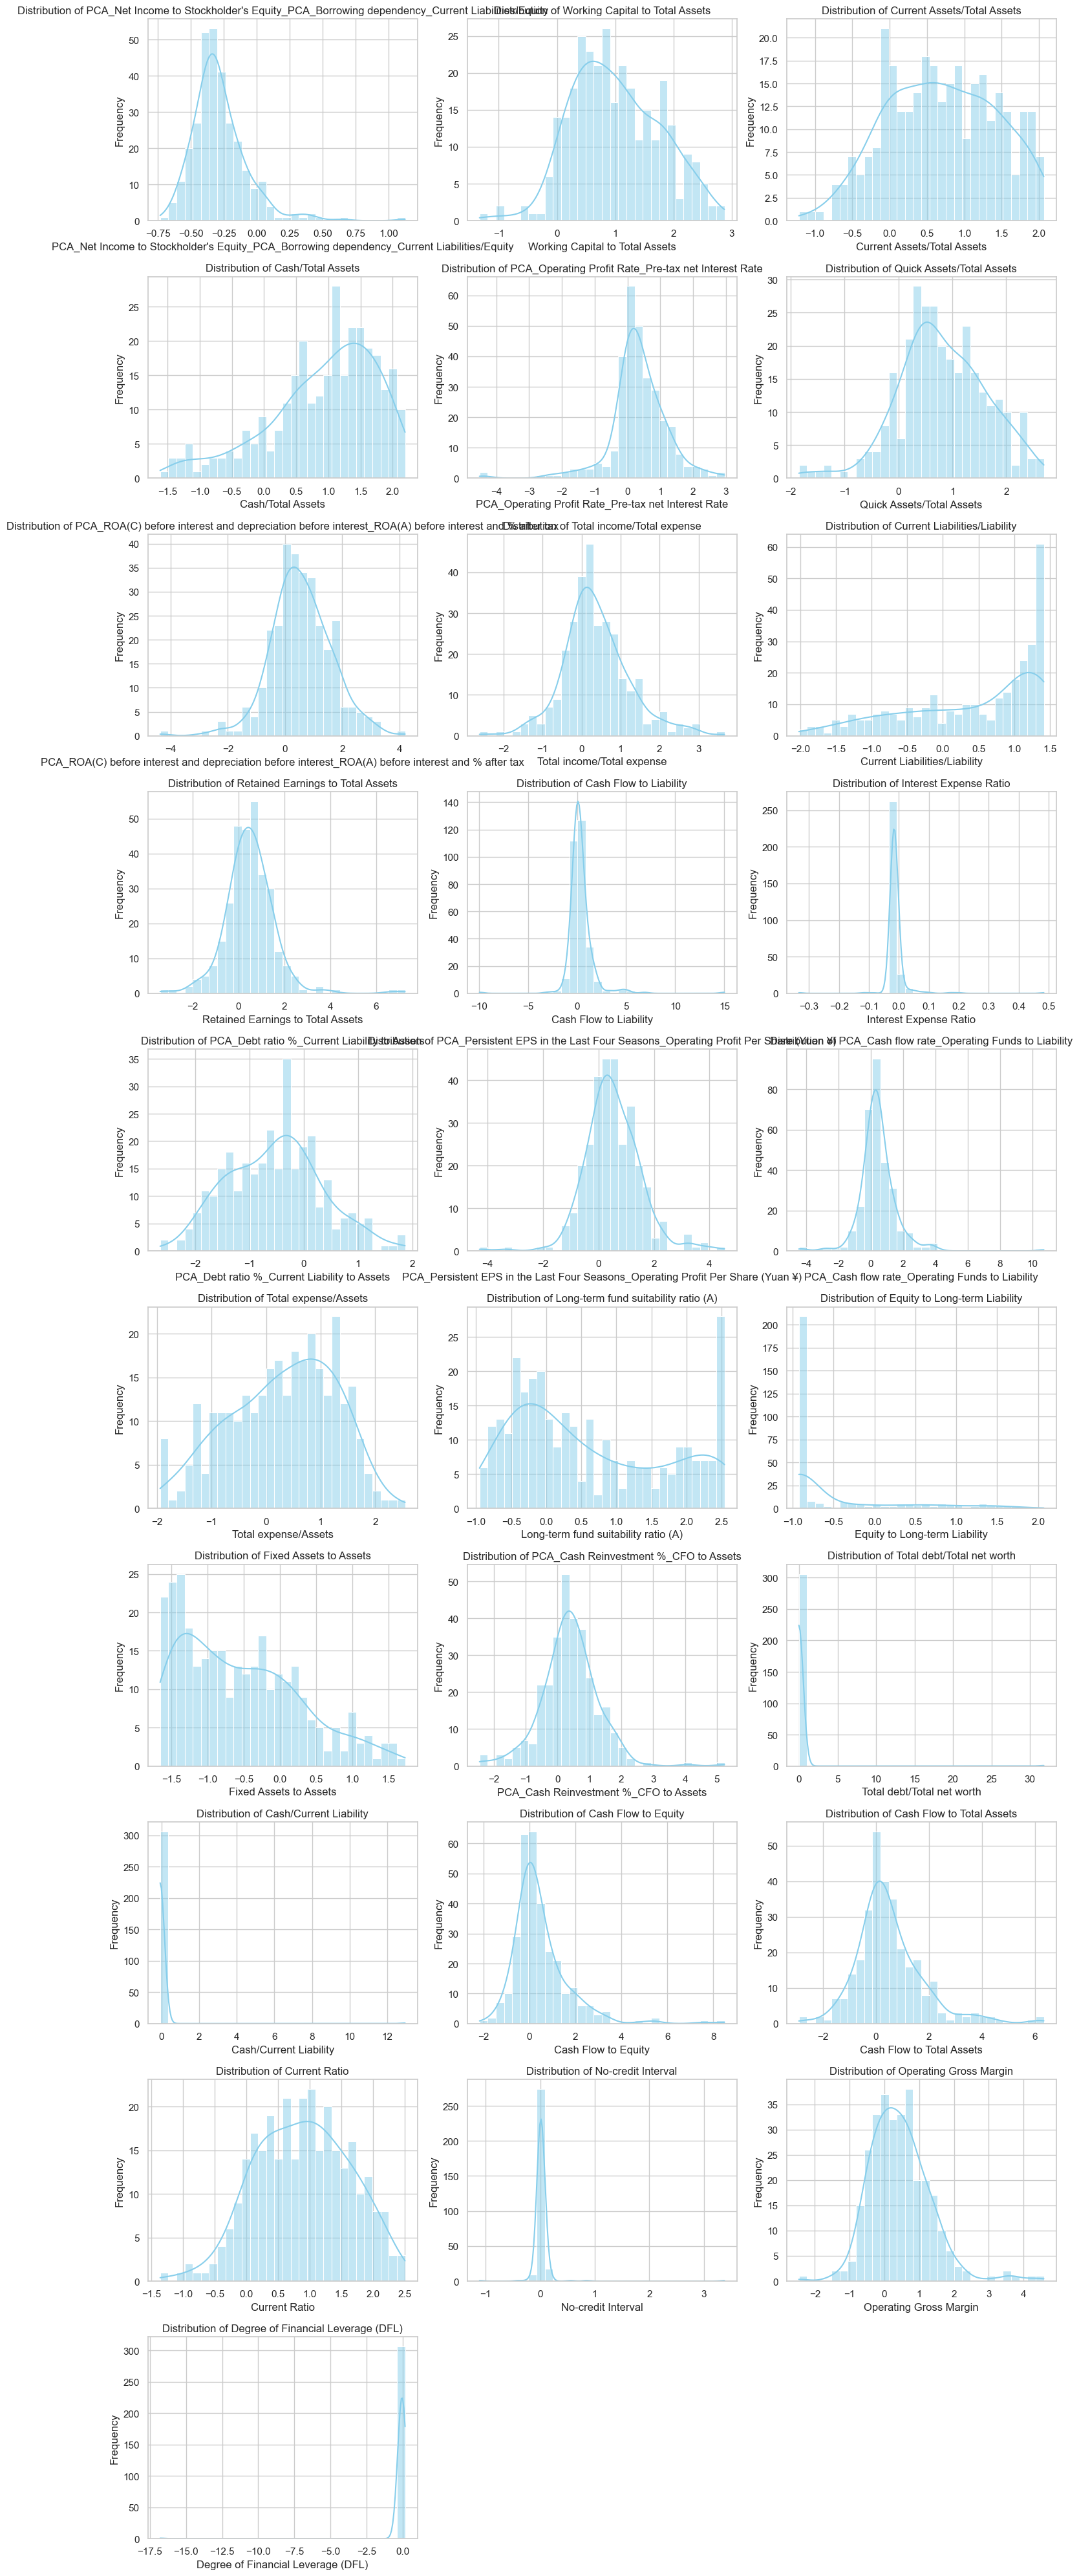

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting style
sns.set(style='whitegrid')

# Create subplots
num_features = X.shape[1]
cols = 3  # Number of columns in the subplot grid
rows = (num_features + cols - 1) // cols  # Calculate required rows

plt.figure(figsize=(cols * 5, rows * 4))

for i, col in enumerate(X.columns, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(X[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [88]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve, classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# === Load data and augment ===
columns_to_drop=[
'Interest Expense Ratio',
'Long-term fund suitability ratio (A)',
'Total debt/Total net worth',
'No-credit Interval',
'Degree of Financial Leverage (DFL)',
]
df = pd.read_csv("output/cluster_test_datasets/predicted_test_cluster_0.csv").drop(columns=columns_to_drop)

In [89]:
import os
import pandas as pd
import joblib

# === Ensure output directory exists ===
os.makedirs('output', exist_ok=True)

# === Prepare data ===
X_orig = df.drop(columns=['Index'])
indexes = df['Index']
print(indexes.shape)
custom_threshold = 0.005

# === Load selected top features ===
top_10_features = joblib.load('top_10_features.pkl')

# === Reduce dataset to selected features ===
X_reduced = X_orig[top_10_features]

# === Generate risk scores and predictions ===
risk_scores_stack = subgroup_0_model.predict_proba(X_reduced)[:, 1]
y_pred_stack = (risk_scores_stack >= custom_threshold).astype(int)

# === Combine with Index column ===
predictions_df = pd.DataFrame({
    'Index': indexes,
    'Predicted_Bankruptcy': y_pred_stack
})

# === Save to CSV ===
predictions_df.to_csv('output/subgroup_0_test_predictions.csv', index=False)
print("Saved predictions to output/Generalization_Predictions.csv")


(307,)
Saved predictions to output/Generalization_Predictions.csv
